In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster


In [2]:
df = pd.read_csv('/content/crashing.csv')

In [3]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,00:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,05:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,20203008,Qld,6,2020,Friday,01:00,Multiple,No,No,Yes,...,17,Inner Regional Australia,Wide Bay,Fraser Coast (R),National or State Highway,No,No,17_to_25,Weekday,Night
1470,20201210,NSW,6,2020,Wednesday,14:48,Multiple,No,No,Yes,...,13,Outer Regional Australia,Far West and Orana,Narromine,Local Road,No,No,0_to_16,Weekday,Day
1471,20205008,WA,6,2020,Monday,11:59,Multiple,No,Yes,No,...,10,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
1472,20205008,WA,6,2020,Monday,11:59,Multiple,No,Yes,No,...,7,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day


In [4]:
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,00:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,05:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [5]:
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1469,20203008,Qld,6,2020,Friday,01:00,Multiple,No,No,Yes,...,17,Inner Regional Australia,Wide Bay,Fraser Coast (R),National or State Highway,No,No,17_to_25,Weekday,Night
1470,20201210,NSW,6,2020,Wednesday,14:48,Multiple,No,No,Yes,...,13,Outer Regional Australia,Far West and Orana,Narromine,Local Road,No,No,0_to_16,Weekday,Day
1471,20205008,WA,6,2020,Monday,11:59,Multiple,No,Yes,No,...,10,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
1472,20205008,WA,6,2020,Monday,11:59,Multiple,No,Yes,No,...,7,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
1473,20205054,WA,6,2020,Tuesday,18:00,Single,No,No,No,...,29,NaN,NaN,NaN,NaN,No,No,26_to_39,Weekday,Night


In [ ]:
df.shape

(52843, 23)

In [6]:
df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

In [7]:
df.dtypes

Crash ID                           int64
State                             object
Month                              int64
Year                               int64
Dayweek                           object
Time                              object
Crash Type                        object
Bus Involvement                   object
Heavy Rigid Truck Involvement     object
Articulated Truck Involvement     object
Speed Limit                      float64
Road User                         object
Gender                            object
Age                                int64
National Remoteness Areas         object
SA4 Name 2016                     object
National LGA Name 2017            object
National Road Type                object
Christmas Period                  object
Easter Period                     object
Age Group                         object
Day of week                       object
Time of day                       object
dtype: object

In [8]:
print(df.isnull().sum())
df = df.dropna()


Crash ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash Type                         0
Bus Involvement                   22
Heavy Rigid Truck Involvement     22
Articulated Truck Involvement     22
Speed Limit                       44
Road User                          0
Gender                             1
Age                                0
National Remoteness Areas        223
SA4 Name 2016                    223
National LGA Name 2017           223
National Road Type               226
Christmas Period                   0
Easter Period                      0
Age Group                          2
Day of week                        0
Time of day                        0
dtype: int64


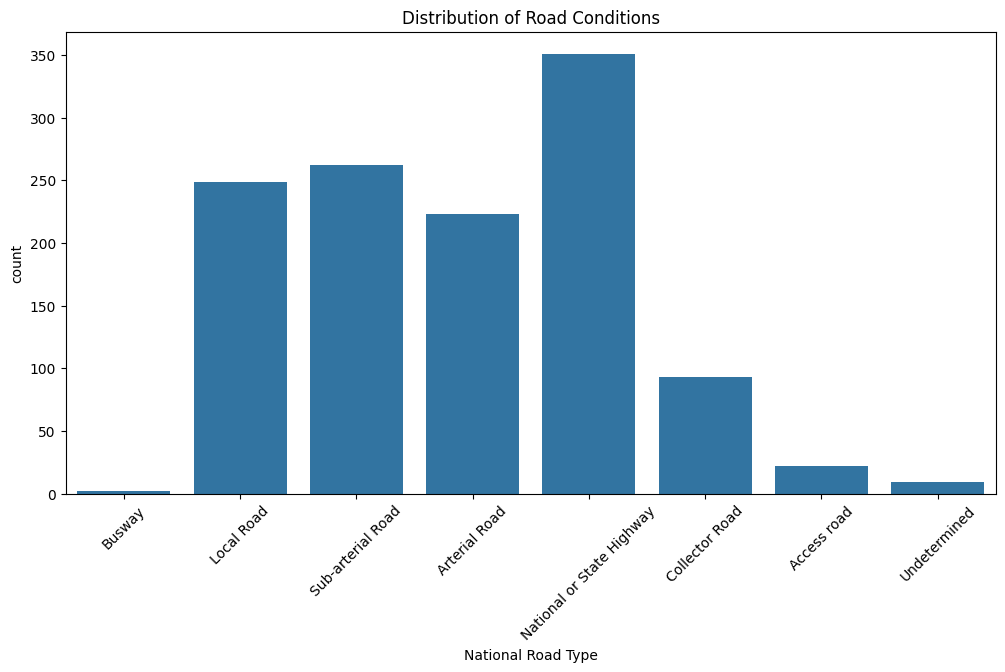

In [9]:
# Countplot for road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='National Road Type', data=df)
plt.title('Distribution of Road Conditions')
plt.xticks(rotation=45)
plt.show()


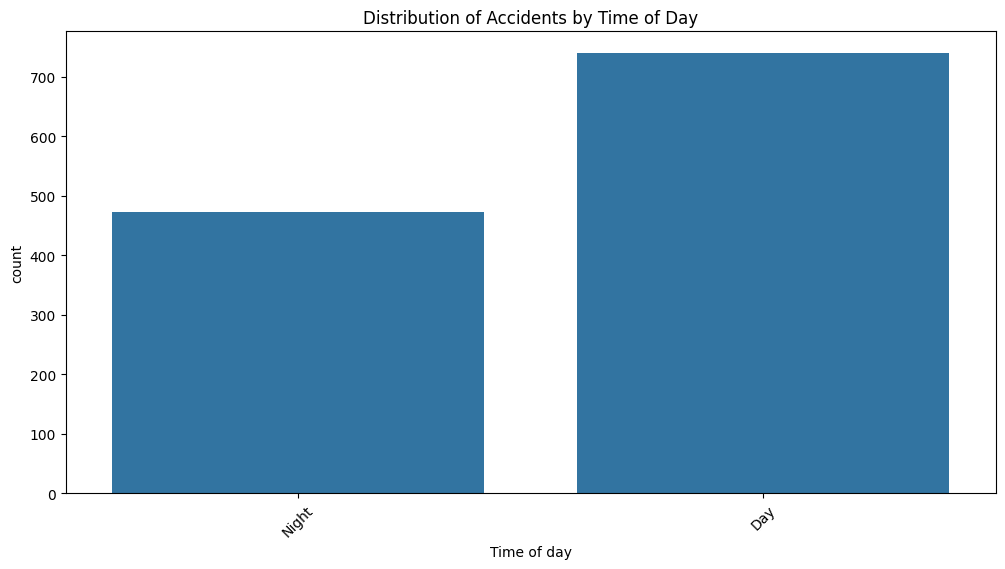

In [10]:
# Countplot for time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='Time of day', data=df)
plt.title('Distribution of Accidents by Time of Day')
plt.xticks(rotation=45)
plt.show()

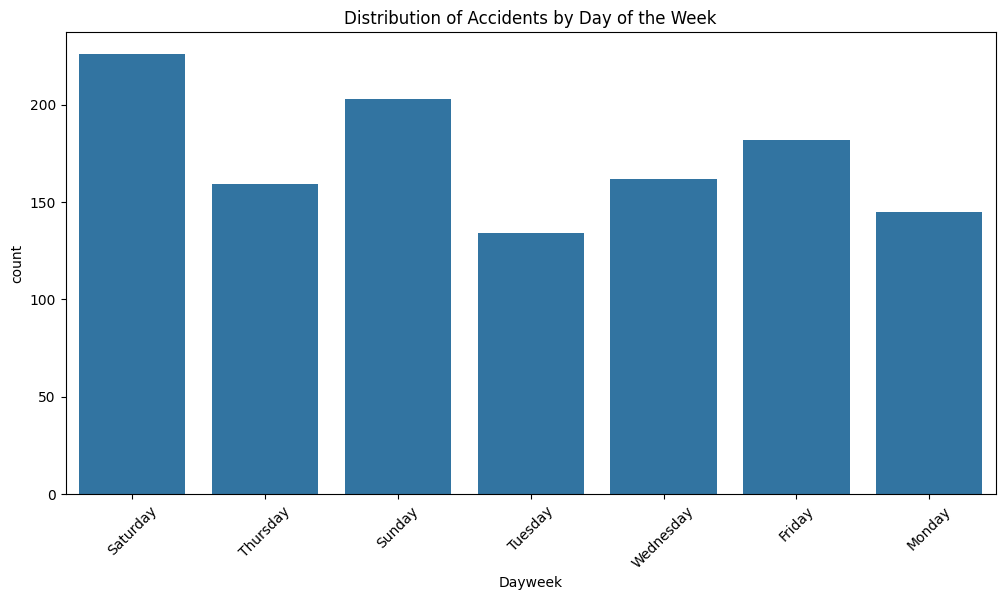

In [11]:
# Countplot for accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Dayweek', data=df)
plt.title('Distribution of Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()